In [67]:
import pandas as pd
import numpy as np
import scipy.stats
import ratmetab
import itertools
from itertools import chain
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import os

import warnings
warnings.filterwarnings('ignore')

In [68]:
data = ratmetab.read_all_data()

In [69]:
def insert_centered_LIscore(dataset, data=data):
    df = data[dataset]
    s = df.LIscore - df.LIscore.mean()
    val = pd.concat([pd.DataFrame({'LIscore cent.': s}, index=df.index), df], axis=1)
    return(val)

def insert_age(dataset, data=data):
    df = data[dataset]
    l = [(lambda g: 'Y' if g == 'Y' else 'A')(group) for group in df.Group]
    val = pd.concat([pd.DataFrame({'Age': l}, index=df.index), df], axis=1)
    return(val)

data = {dataset: insert_age(dataset, data=data) for dataset in data.keys()}
data = {dataset: insert_centered_LIscore(dataset, data=data) for dataset in data.keys()}

In [70]:
codebookpath = '../RatMetabolites/Rat_codebook_27_Oct_2022.csv'
codebook = pd.read_csv(codebookpath, index_col='MetaboliteName')
codebook['Metabolite'] = codebook.index
#codebook = ratmetab.add_subclassification_to_df(codebook, ratmetab.read_subclassification(), class_col='AnalyteClass')
codebook

,Assay,AnalyteClass,HMDB_UID,CAS_UID,UnitofConcentration,metabolite,Metabolite
MetaboliteName,,,,,,,
22R-Hydroxycholesterol,Oxysterol assay,Free_Oxysterols,HMDB0004035,CAS-17954-98-2,[fmol/mg tissue],_22R_OHC,22R-Hydroxycholesterol
24S-Hydroxycholesterol,Oxysterol assay,Free_Oxysterols,HMDB01419,CAS-474-73-7,[fmol/mg tissue],_24S_OHC,24S-Hydroxycholesterol
"24,25-Epoxycholesterol",Oxysterol assay,Free_Oxysterols,NaN,CAS-77058-74-3,[fmol/mg tissue],_24_25_EC,"24,25-Epoxycholesterol"
"24,25-Dihydrolanosterol",Oxysterol assay,Free_Oxysterols,HMDB0006839,CAS-79-62-9,[fmol/mg tissue],_24_DHLan,"24,25-Dihydrolanosterol"
25-Hydroxycholesterol,Oxysterol assay,Free_Oxysterols,HMDB06247,CAS-2140-46-7,[fmol/mg tissue],_25_OHC,25-Hydroxycholesterol
27-Hydroxycholesterol,Oxysterol assay,Free_Oxysterols,HMDB02103,"CAS-13095-61-9, CAS-20380-11-4",[fmol/mg tissue],_27_OHC,27-Hydroxycholesterol
4-beta-Hydroxycholesterol,Oxysterol assay,Free_Oxysterols,HMDB0013643,CAS-17320-10-4,[fmol/mg tissue],_4b_OHC,4-beta-Hydroxycholesterol
"5-alpha,6-alpha-Epoxycholesterol",Oxysterol assay,Free_Oxysterols,NaN,CAS-4025-59-6,[fmol/mg tissue],_5a6a_EC,"5-alpha,6-alpha-Epoxycholesterol"
"5-beta,6-beta-Epoxycholesterol",Oxysterol assay,Free_Oxysterols,NaN,CAS-4025-59-6,[fmol/mg tissue],_5b6b_EC,"5-beta,6-beta-Epoxycholesterol"


In [11]:
""""codebookpath = '../RatMetabolites/Rat_codebook_27_Oct_2022.csv'
datapath = {
    'blood new': 'blood_27_Oct_2022',
    'brain new': 'brain_27_Oct_2022',
    'blood old': 'old_blood_17_Nov_2022',
    'brain old': 'old_brain_17_Nov_2022',
               }
data = {k: ratmetab.read_data('../RatMetabolites/Rat_' + v + '.csv', codebookpath, liberal_filter=True) for k, v in datapath.items()}

data.update({tissue: pd.concat([data[tissue + ' new'], data[tissue + ' old']], axis=0, join='outer') for tissue in ['blood', 'brain']})

def insert_centered_LIscore(dataset, data=data):
    df = data[dataset]
    s = df.LIscore - df.LIscore.mean()
    val = pd.concat([pd.DataFrame({'LIscore cent.': s}, index=df.index), df], axis=1)
    return(val)

def insert_age(dataset, data=data):
    df = data[dataset]
    l = [(lambda g: 'Y' if g == 'Y' else 'A')(group) for group in df.Group]
    val = pd.concat([pd.DataFrame({'Age': l}, index=df.index), df], axis=1)
    return(val)

data = {dataset: insert_age(dataset, data=data) for dataset in data.keys()}
data = {dataset: insert_centered_LIscore(dataset, data=data) for dataset in data.keys()}"""

'"codebookpath = \'../RatMetabolites/Rat_codebook_27_Oct_2022.csv\'\ndatapath = {\n    \'blood new\': \'blood_27_Oct_2022\',\n    \'brain new\': \'brain_27_Oct_2022\',\n    \'blood old\': \'old_blood_17_Nov_2022\',\n    \'brain old\': \'old_brain_17_Nov_2022\',\n               }\ndata = {k: ratmetab.read_data(\'../RatMetabolites/Rat_\' + v + \'.csv\', codebookpath, liberal_filter=True) for k, v in datapath.items()}\n\ndata.update({tissue: pd.concat([data[tissue + \' new\'], data[tissue + \' old\']], axis=0, join=\'outer\') for tissue in [\'blood\', \'brain\']})\n\ndef insert_centered_LIscore(dataset, data=data):\n    df = data[dataset]\n    s = df.LIscore - df.LIscore.mean()\n    val = pd.concat([pd.DataFrame({\'LIscore cent.\': s}, index=df.index), df], axis=1)\n    return(val)\n\ndef insert_age(dataset, data=data):\n    df = data[dataset]\n    l = [(lambda g: \'Y\' if g == \'Y\' else \'A\')(group) for group in df.Group]\n    val = pd.concat([pd.DataFrame({\'Age\': l}, index=df.index)

In [5]:
#codebook = pd.read_csv(codebookpath, index_col='MetaboliteName')

In [71]:
def scipy_transfor_helper(s, fun=scipy.stats.boxcox):
    try:
        val = fun(s)[0]
    except(ValueError):
        val = s.apply(lambda x: np.nan)
    res = pd.Series(val, index=s.index)
    return(res)

def myboxcox(s): return(scipy_transfor_helper(s, scipy.stats.boxcox))
def myyeojohnson(s): return(scipy_transfor_helper(s, scipy.stats.yeojohnson))

def transform_data(aclass, transformation=np.log, dat=data['blood'], codebook=codebook, class_col='AnalyteClass'):
    aclass_metabolites = codebook.loc[codebook[class_col] == aclass].index
    sel_metabolites = list(set(dat.columns).intersection(set(aclass_metabolites)))
    sel_cols = ['LIscore cent.', 'Age'] + sel_metabolites
    df = dat.loc[:, sel_metabolites]
    df = df.apply(transformation, axis=1)
    # standardization
    df = df.apply(lambda x: (x - df.mean(axis=0)) / df.std(axis=0), axis=1)
    return(df)

transformations = {
    'no': lambda x: x,
    'log': np.log,
    'Box-Cox': myboxcox,
    'Yeo-Johnson': myyeojohnson,
}

def distplot_aclass(aclass, transformations=transformations, dat=data['blood'], codebook=codebook, class_col='AnalyteClass'):
    ntrans = len(transformations)
    fig, ax = plt.subplots(1, ntrans, figsize=(4 * ntrans, 4))
    std_trans_dfs = {name: transform_data(aclass, transformation=trans, dat=dat, codebook=codebook, class_col=class_col) for name, trans in transformations.items()}
    df0 = std_trans_dfs[list(transformations.keys())[0]]
    stepsize = np.int64(np.floor(len(mcolors.CSS4_COLORS) / df0.shape[1]))
    colors = list(mcolors.CSS4_COLORS.values())[::stepsize]
    for metabolite, color in zip(df0, colors):
        for i, items in enumerate(zip(ax, std_trans_dfs.keys(), std_trans_dfs.values())):
            axi, name, tdf = items
            label = metabolite if i == 0 else None
            sm.qqplot(tdf[metabolite], label=label, ax=axi, linewidth=1, linestyle='solid', color=color, markerfacecolor=color, marker='.', line='45')
            axi.set_title(name + ' transformation')
            axi.set_xlabel('')
            axi.set_ylabel('')
    fig.legend(ncol=ntrans, loc='upper center', bbox_to_anchor=(0.5, 0), title=aclass + ' in data set')
    fig.suptitle(aclass + ': normal QQ plots')
    #fig.supxlabel('Theoretical quantiles')
    #fig.supylabel('Sample quantiles')
    return((fig, ax))

['Acylcarnitines', 'Amino_Acids_and_Biogenic_Amines', 'Bile_Acids', 'Ceramides', 'Free_Fatty_Acids', 'Free_Oxysterols', 'Hexoses', 'Lysophosphatidylcholines', 'Phosphatidylcholines', 'Phosphatidylethanolamines', 'Phosphatidylglycerols', 'Phosphatidylserines', 'Sphingomyelins']


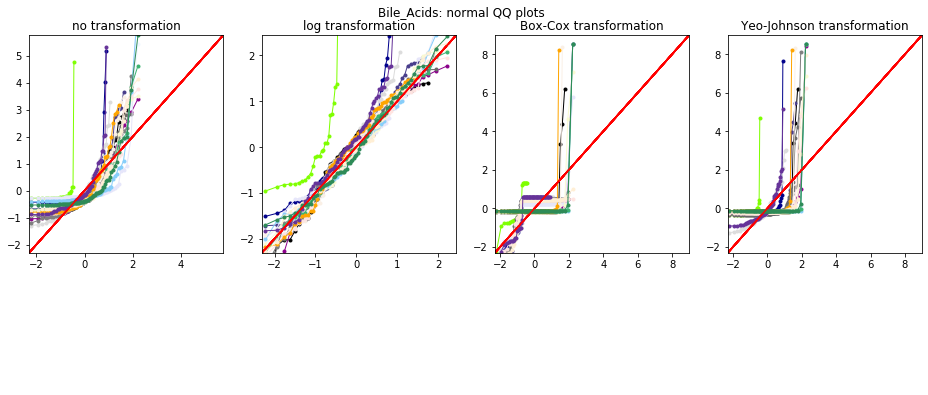

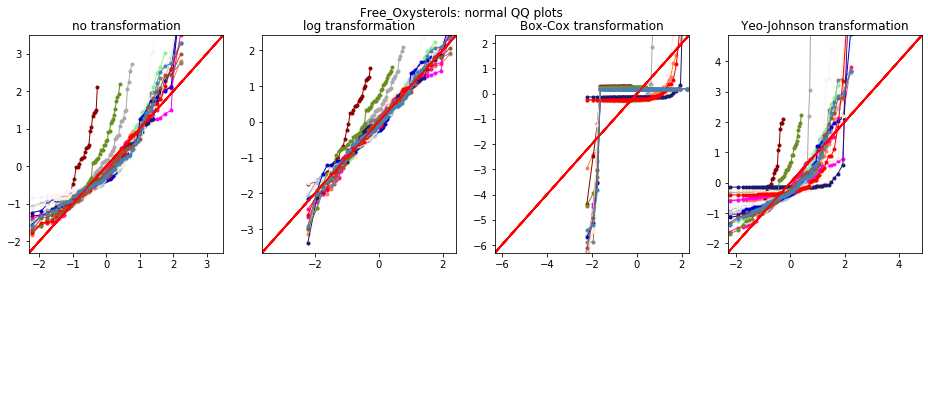

In [55]:
class_col = 'AnalyteClass'
subclasses = list(np.unique(codebook[class_col]))
print(subclasses)
subclasses.remove('Acylcarnitines')
subclasses.remove('Amino_Acids_and_Biogenic_Amines')
subclasses.remove('Ceramides')
subclasses.remove('Free_Fatty_Acids')
subclasses.remove('Hexoses')
subclasses.remove('Lysophosphatidylcholines')
subclasses.remove('Phosphatidylcholines')
subclasses.remove('Phosphatidylethanolamines')
subclasses.remove('Phosphatidylglycerols')
subclasses.remove('Phosphatidylserines')
subclasses.remove('Sphingomyelins')
for aclass in subclasses:
    fig, ax = distplot_aclass(aclass, dat=data['blood'], codebook=codebook, class_col=class_col)

In [75]:
fm4 = 'Level ~ C(Age, levels=["Y", "A"]) + Age : Q("LIscore cent.")'
fm5 = 'Level ~ C(Age, levels=["Y", "A"]) * Q("LIscore cent.")'

def fit_aclass_data(aclass, formula, transformation=transformations['no'], dat=data['blood'], codebook=codebook, class_col='AnalyteClass'):
    df = transform_data(aclass, transformation=transformation, dat=dat, codebook=codebook, class_col=class_col)
    sel_metabolites = df.columns
    df = df.stack(dropna=False).to_frame('Level')
    df['Age'] = np.repeat(dat.Age, len(sel_metabolites)).to_list()
    df['LIscore cent.'] = np.repeat(dat['LIscore cent.'], len(sel_metabolites)).to_list()
    df['Metabolite'] = df.index.get_level_values(1)
    df = df.dropna()
    fmod = smf.mixedlm(formula, data=df, groups='Metabolite').fit()
    return(fmod)

def extract_fit_info(fmod, aclass, transformation_name):
    fmod.summary()
    d = {'Estimate': fmod.params, 'SE': fmod.bse, 'p': fmod.pvalues}
    ll = [a.to_list() for a in d.values()]
    #l = itertools.chain(*ll)
    l = list(chain(*ll))
    ix = pd.MultiIndex.from_product([d.keys(), d['Estimate'].index])
    df = pd.DataFrame({aclass: l}, index=ix).transpose()
    df[('General', 'Converged')] = fmod.converged
    df[('General', 'Fitted model')] = fmod
    df[('General', 'Transformation')] = transformation_name
    return(df)

def process_aclass(aclass, formula, transformation_name='no', dat=data['blood'], codebook=codebook, class_col='AnalyteClass'):
    transformation = transformations[transformation_name]
    fmod = fit_aclass_data(aclass, formula, transformation=transformation, dat=dat, codebook=codebook, class_col=class_col)
    df = extract_fit_info(fmod, aclass, transformation_name)
    return(df)

In [76]:
class_col = 'AnalyteClass'
l = [process_aclass(aclass, fm4, transformation_name='no', class_col=class_col) for aclass in np.unique(codebook[class_col])]
results_m4 = pd.concat(l, axis=0)

In [79]:
class_col = 'AnalyteClass'
l = [process_aclass(aclass, fm4, transformation_name='log', class_col=class_col) for aclass in np.unique(codebook[class_col])]
results_m4_log = pd.concat(l, axis=0)

In [77]:
results_m4

Estimate                                 \
                                    Intercept C(Age, levels=["Y", "A"])[T.A]   
Acylcarnitines                   6.858783e-17                       0.019646   
Amino_Acids_and_Biogenic_Amines -4.984035e-17                      -0.010743   
Bile_Acids                      -6.605985e-02                       0.114752   
Ceramides                       -5.420327e-01                       0.797486   
Free_Fatty_Acids                 7.511543e-16                       0.203263   
Free_Oxysterols                 -3.977461e-01                       0.640660   
Hexoses                          5.768940e-01                      -0.864633   
Lysophosphatidylcholines         2.083574e-15                       0.443270   
Phosphatidylcholines            -7.147022e-01                       1.082648   
Phosphatidylethanolamines       -4.548292e-01                       0.647927   
Phosphatidylglycerols           -4.157804e-01                       0.544424   
Phosphatidylserines             -1.998570e-01                       0.309815   
Sphingomyelins                  -5.794983e-01                       0.849524   

                                                           \
                                Age[A]:Q("LIscore cent.")   
Acylcarnitines                                   0.002192   
Amino_Acids_and_Biogenic_Amines                  0.000835   
Bile_Acids                                      -0.000489   
Ceramides                                       -0.001683   
Free_Fatty_Acids                                -0.000334   
Free_Oxysterols                                 -0.003698   
Hexoses                                          0.000420   
Lysophosphatidylcholines                        -0.001410   
Phosphatidylcholines                            -0.001229   
Phosphatidylethanolamines                        0.001191   
Phosphatidylglycerols                            0.003150   
Phosphatidylserines                              0.000609   
Sphingomyelins                                   0.001840   

                                                                          \
                                Age[Y]:Q("LIscore cent.") Metabolite Var   
Acylcarnitines                                   0.001229   0.000000e+00   
Amino_Acids_and_Biogenic_Amines                 -0.000813   0.000000e+00   
Bile_Acids                                       0.000900   6.559931e-05   
Ceramides                                       -0.001107   1.013036e-10   
Free_Fatty_Acids                                 0.001081   0.000000e+00   
Free_Oxysterols                                 -0.000068   5.599380e-05   
Hexoses                                          0.000485   1.000000e+00   
Lysophosphatidylcholines                         0.001310   0.000000e+00   
Phosphatidylcholines                             0.000354   5.177766e-05   
Phosphatidylethanolamines                       -0.000782   1.084172e-07   
Phosphatidylglycerols                           -0.000385   1.679678e-03   
Phosphatidylserines                              0.002299   1.330368e-06   
Sphingomyelins                                  -0.000109   7.898234e-07   

                                           SE                                 \
                                    Intercept C(Age, levels=["Y", "A"])[T.A]   
Acylcarnitines                   1.038866e+06                       0.073588   
Amino_Acids_and_Biogenic_Amines  5.388829e+05                       0.044073   
Bile_Acids                       5.131444e-02                       0.061686   
Ceramides                        3.950055e-02                       0.046794   
Free_Fatty_Acids                 7.458616e+05                       0.054789   
Free_Oxysterols                  4.996154e-02                       0.060128   
Hexoses                          9.560794e-01                       0.245114   
Lysophosphatidylcholines         8.427543e+05              

In [80]:
results_m4_log

Estimate                                 \
                                    Intercept C(Age, levels=["Y", "A"])[T.A]   
Acylcarnitines                   2.839677e-16                       0.081303   
Amino_Acids_and_Biogenic_Amines -1.452446e-16                      -0.031297   
Bile_Acids                      -7.456179e-02                       0.136545   
Ceramides                       -6.167576e-01                       0.907082   
Free_Fatty_Acids                 5.736844e-16                       0.155241   
Free_Oxysterols                 -4.026501e-01                       0.644847   
Hexoses                          5.563272e-01                      -0.824384   
Lysophosphatidylcholines         1.801474e-15                       0.383257   
Phosphatidylcholines            -7.481990e-01                       1.136766   
Phosphatidylethanolamines        2.501565e-15                       0.819244   
Phosphatidylglycerols           -4.982612e-01                       0.656413   
Phosphatidylserines             -2.505941e-01                       0.393401   
Sphingomyelins                  -5.903503e-01                       0.873627   

                                                           \
                                Age[A]:Q("LIscore cent.")   
Acylcarnitines                                   0.002096   
Amino_Acids_and_Biogenic_Amines                  0.000831   
Bile_Acids                                      -0.002035   
Ceramides                                       -0.002213   
Free_Fatty_Acids                                -0.000562   
Free_Oxysterols                                 -0.003478   
Hexoses                                         -0.000352   
Lysophosphatidylcholines                        -0.001030   
Phosphatidylcholines                            -0.001417   
Phosphatidylethanolamines                        0.000321   
Phosphatidylglycerols                            0.003221   
Phosphatidylserines                             -0.000422   
Sphingomyelins                                   0.001362   

                                                                          \
                                Age[Y]:Q("LIscore cent.") Metabolite Var   
Acylcarnitines                                   0.000960   0.000000e+00   
Amino_Acids_and_Biogenic_Amines                 -0.000968   1.232595e-32   
Bile_Acids                                       0.000255   6.557037e-05   
Ceramides                                       -0.001611   6.386290e-07   
Free_Fatty_Acids                                 0.000968   0.000000e+00   
Free_Oxysterols                                 -0.000143   5.596192e-05   
Hexoses                                          0.000577   1.000000e+00   
Lysophosphatidylcholines                         0.001434   0.000000e+00   
Phosphatidylcholines                             0.000555   8.470638e-05   
Phosphatidylethanolamines                       -0.001145   0.000000e+00   
Phosphatidylglycerols                           -0.000683   1.649344e-03   
Phosphatidylserines                              0.001804   1.329181e-06   
Sphingomyelins                                   0.000138   2.342549e-05   

                                           SE                                 \
                                    Intercept C(Age, levels=["Y", "A"])[T.A]   
Acylcarnitines                   1.038156e+06                       0.073538   
Amino_Acids_and_Biogenic_Amines  3.665188e-02                       0.044059   
Bile_Acids                       5.118907e-02                       0.061535   
Ceramides                        3.862061e-02                       0.045776   
Free_Fatty_Acids                 7.475822e+05                       0.054915   
Free_Oxysterols                  4.999052e-02                       0.060163   
Hexoses                          9.633036e-01                       0.246966   
Lysophosphatidylcholines         8.478180e+05              

In [103]:
def plot_param(param='Age[A]:Q("LIscore cent.")', results=results_m4, model='Mixed M4', show_convergence=False):
    fig, ax = plt.subplots(1, 2, figsize=(22, 3), sharey=True)
    yticks = np.arange(results.shape[0])
    Estimate = results[('Estimate', param)]
    SE = results[('SE', param)]
    converged = results[('General', 'Converged')]
    convergence_warning_col = 'red' if show_convergence else 'C0'
    color = converged.apply(lambda b: 'C0' if b else convergence_warning_col)
    if show_convergence:
        handles = [mpatches.Patch(color=c) for c in ['C0', 'red']]
        labels = ['yes', 'no']
        fig.legend(handles, labels, title='Converged?', loc='center', bbox_to_anchor=(0.51, 0.85))
    ax[0].barh(yticks, Estimate, xerr=SE, color=color)
    ax[0].set_yticks(yticks)
    ax[0].set_yticklabels(results.index)
    ax[0].set_title('Estimates')
    ax[0].grid(axis='both')
    pval = results[('p', param)]
    ax[1].scatter(x=pval, y=yticks, c=color)
    ax[1].grid(axis='both')
    ax[1].set_title('p-values')
    ax[1].set_xscale('log')
    fig.suptitle(model + ' Parameter: ' + param)
    return((fig, ax))

In [86]:
#fig, ax = plot_param(param='C(Age, levels=["Y", "A"])[T.A]', results=results_m4, model='Mixed M4')

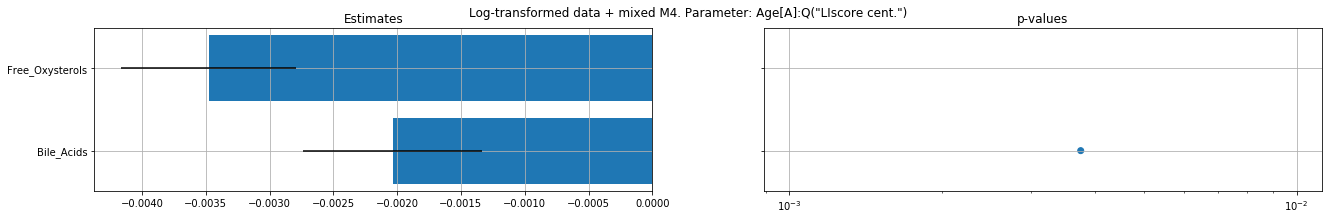

In [104]:
sel_classes = ['Bile_Acids', 'Free_Oxysterols']
fig, ax = plot_param(param='Age[A]:Q("LIscore cent.")', results=results_m4_log.loc[sel_classes], model='Log-transformed data + mixed M4.', show_convergence=False)